# Two simple algorithms: parity and max

## Divisibility by number base

* to see if a number is divisible by 10, check if ends in a 0
* divisible by 2, last digit is 0

### Parity of a number algorithm (integers only)

1. Convert number to binary
2. Check if last digit is zero

---

* Bitwise operations 
    - AND &, OR |, XOR ^, NOT ~, >>, <<
    - AND: both have to be true (1)
    - OR: either is true
    - XOR: true if arguments are the same

In [4]:
# bitwise logic
a,b = 3,5  # 3=0011, 5=0101
print('  a = {0:d} ({0:04b})\n  b = {1:d} ({1:04b})'.format(a,b))
print('a&b = {0:d} ({0:04b})'.format(a&b))
print('a|b = {0:d} ({0:04b})'.format(a|b))
print('a^b = {0:d} ({0:04b})'.format(a^b))

  a = 3 (0011)
  b = 5 (0101)
a&b = 1 (0001)
a|b = 7 (0111)
a^b = 6 (0110)


* Bit shifts 
    - arguments are (arithmetic) shifted by one spot 
    - using <<, >> 

Can we replace arithmetic operations with bit operations? 

* Yes

In [5]:
# bit shifts
a = 0b11100011
b = a >> 1
print('  a = {0:4d} ({0:016b})\n  b = {1:4d} ({1:016b})\n'.format(a,b))
b = a << 2
print('  a = {0:4d} ({0:016b})\n  b = {1:4d} ({1:016b})\n'.format(a,b))

  a =  227 (0000000011100011)
  b =  113 (0000000001110001)

  a =  227 (0000000011100011)
  b =  908 (0000001110001100)



In [6]:
# arithmetic operations with bit shifts
a = 0b11100011
print('  a = {0:4d} ({0:016b})'.format(a))

for i in range(1,10):
    x = 2**i
    d = a//x
    s = a>>i
    print('a//%d = %d, a>>%d = %d' % (x,d,i,s))

  a =  227 (0000000011100011)
a//2 = 113, a>>1 = 113
a//4 = 56, a>>2 = 56
a//8 = 28, a>>3 = 28
a//16 = 14, a>>4 = 14
a//32 = 7, a>>5 = 7
a//64 = 3, a>>6 = 3
a//128 = 1, a>>7 = 1
a//256 = 0, a>>8 = 0
a//512 = 0, a>>9 = 0


* shifting by n bits to the right is the same as dividing by 2^{n} (whichever base is chosen)
* shifting by n bits to the left is the same as multiplying

In [7]:
a = 0b11100011
print('  a = {0:4d} ({0:016b})'.format(a))

for i in range(1,10):
    x = 2**i
    d = a*x
    s = a<<i
    print('a//%d = %d, a>>%d = %d' % (x,d,i,s))

  a =  227 (0000000011100011)
a//2 = 454, a>>1 = 454
a//4 = 908, a>>2 = 908
a//8 = 1816, a>>3 = 1816
a//16 = 3632, a>>4 = 3632
a//32 = 7264, a>>5 = 7264
a//64 = 14528, a>>6 = 14528
a//128 = 29056, a>>7 = 29056
a//256 = 58112, a>>8 = 58112
a//512 = 116224, a>>9 = 116224


## Parity algorithm

* Complexity? Only have to check one bit (size of input does not matter)
    - the implementation matters 
    - using AND may check many bits 

In [24]:
def parity(n, verbose=False):
    '''Returns 1 if passed integer number is odd'''
    assert isinstance(n, int), 'parity() only works for int'
    if verbose:
        print('  n = {0:4d} ({0:016b}) --> parity={1}'.format(n, parity(n, verbose=False))) 
    return n & 1  #1 is in decimal for now; true if n & 1 are the same (True implies number is odd)

#x = 0b1001011011
#print(parity(x)) -- prints none because nothing returned (this is before anything (only pass included))


# 4d means take at least four spaces 

x = 0b1001111110101011
print(parity(x,True))

# if x is a float number, then & is not defined
# use ifinstance than n is an integer

  n = 40875 (1001111110101011) --> parity=1
1


In [26]:
for n in [2,4,7,32,543,671,780]:
    print('n = {0:5d} ({0:08b}), parity={1}'.format(n,parity(n)))

n =     2 (00000010), parity=0
n =     4 (00000100), parity=0
n =     7 (00000111), parity=1
n =    32 (00100000), parity=0
n =   543 (1000011111), parity=1
n =   671 (1010011111), parity=1
n =   780 (1100001100), parity=0


## Finding max/ min in a list 

* in worst case, no way to avoid checking all elements 
* complexity is linear in the number of elements of list (order n)

In [29]:
import numpy as np

def maximum_from_list(vars):
    m = -np.Infinity
    for x in vars:
        if x > m:
            m = x # if x > current maximum, then x becomes maximum
            
    return m

maximum_from_list([1,2,5,3])

5

In [ ]:
def max(vars):
    
    m = float('inf') # works too 

* to improve the code:
    - convert if to one string 

In [31]:
def maximum(vars):
    m = float('-inf')
    for x in vars:
        m = x if x > m else m
            
    return m

maximum([1,2,5,3])

5

In [32]:
for i in range(5):
    list = np.random.uniform(low=0.0, high=100.0, size=10)
    m = maximum_from_list(list)
    print('Maximum in {} is {:.2f}'.format(list,m))

Maximum in [ 6.1872426  28.94507794 26.24063093 30.55722448  6.73120435  2.11235759
 92.9659056  29.44920265 35.06748672 43.70853269] is 92.97
Maximum in [15.98476607 39.63176928  0.56816448 38.16506505 32.49299613 95.78922086
 45.33560703 76.42366621 69.14040617 47.94902966] is 95.79
Maximum in [53.84925855 75.42968996 86.34706668 21.21658496 74.45827317 99.98100336
 50.62466914 31.6902252  18.51483833 35.73897689] is 99.98
Maximum in [69.77390227 49.3318914  86.49920867 75.17180883 27.11180477 62.01895162
 47.3176319   9.32339906 99.76365774 61.36430128] is 99.76
Maximum in [89.11440451 31.67929718  3.23715835  9.82881424 30.23107694 57.15907513
 57.62967723  6.31468137 58.11873344 79.31847455] is 89.11


# Binary search algorithm

Member of divide-and-conquer class of algorithms

* divide problem into subproblems 
* solve subproblems
* combine answers to subproblems 

In [66]:
def sum_list(l):
    '''Summing the elements of the list using DAC algorithm'''
    
    if len(l)==1:
        print('Sum of list of one element is {}'.format(l[0]))
        return l[0]
    
    j = len(l)//2 # the middle of the list (integer division)
    
    print('Dividing {} into {} and {}'.format(l, l[:j], l[j:]))
    
    
    sum = sum_list(l[:j]) + sum_list(l[j:]) # sum of first half and second half of the list 
    # have to stop the recursion (above line is calling itself over and over again)
    # have to return something otherwise 'sum' doesn't work 

    print('Returning the sum of {} = {}'.format(l,sum))
        
    return sum

In [67]:
print(sum_list([1,2,6,5,2]))

Dividing [1, 2, 6, 5, 2] into [1, 2] and [6, 5, 2]
Dividing [1, 2] into [1] and [2]
Sum of list of one element is 1
Sum of list of one element is 2
Returning the sum of [1, 2] = 3
Dividing [6, 5, 2] into [6] and [5, 2]
Sum of list of one element is 6
Dividing [5, 2] into [5] and [2]
Sum of list of one element is 5
Sum of list of one element is 2
Returning the sum of [5, 2] = 7
Returning the sum of [6, 5, 2] = 13
Returning the sum of [1, 2, 6, 5, 2] = 16
16


In [45]:
del sun_list

In [49]:
del sum_list 

Best way to sum elements of list? No, but tells us about DAC algorithms. 

### Complexity of DAC algorithms 

* dividing into subsections divides the work that is needed 
    - size of problem is $\frac{n}{b^{x}}$ 
    - so $x$ is a Big(O) of $log(n)$
    
---

Typical DAC Algorithms

* binary search
* quicksort 
* Fast Fourier transform
* Karatsuba fast multiplication

--- 

Binary search

* input: sorted list of numbers, and a value to find

-- 

1. Find middle point
2. If the sought value if below, reduce the list to the lower half (or above)

In [8]:
def binary_search(list=[0,1], val=0, verbose=True):
    '''Binary search of val in the given list'''
    
    if verbose:
        print('List = {}'.format(list))
        print('Value to find is {}'.format(val))
        
    if val == list[-1]:
        return len(list)-1
    
    i1, i2 = 0, len(list) - 1 # indices (the bounds)
    j = (i1 + i2)//2
    
    
    while list[j]!=val:
        if list[j] > val:
            i2 = j       # go to lower half of list (update i2)
        else:
            i1 = j
        print('Searching between {} and {}'.format(list[i1],list[i2]))
        j = (i1 + i2)//2
    if verbose:
        print('Found {} at index {}'.format(val,j))
    return j 
        
print(binary_search([4,6,8,19,34,67],67)) 

List = [4, 6, 8, 19, 34, 67]
Value to find is 67
5


Taken photo at 12:23 13/04/2021 of the code that only works for '4' but not '67'

Using integer division; indexes 4 and 5 gives 4 --- so the last bound is not being updated and no convergence [add in the list[-1] appendage]

In [14]:
import numpy as np
N = 80
# random sorted sequence of integers up to 100
x = np.random.choice(100,size=N,replace=False)
x = np.sort(x)
# random choice of one number/index
k0 = np.random.choice(N,size=1)

k1 = binary_search(list=x,val=x[k0])
print("Searched for %d, found x[%d]=%d"%(x[k0],k1,x[k1]))

List = [ 0  2  3  4  5  6  7  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25 27
 28 29 30 31 33 34 35 36 38 39 40 41 42 43 44 47 48 50 51 53 54 56 57 58
 60 61 62 64 65 67 68 70 71 73 74 75 77 78 79 80 81 82 83 84 86 87 88 89
 90 91 92 93 96 97 98 99]
Value to find is [93]
Searching between 47 and 99
Searching between 75 and 99
Searching between 87 and 99
Searching between 92 and 99
Searching between 92 and 96
Found [93] at index 75
Searched for 93, found x[75]=93


The number of steps does not increase much with the size of the list. Harks back to the complexity idea. 

# Enumeration of discrete compositions

* share discrete goods with a finite amount of agents 

## Generators in Python 

* **yield** keyword is a special kind of return from a function
    - pauses the function execution; useful if the output requires large storage
    - waits for the next iteration request from the caller
    - saves the state of the function for the next call 
    - use generators instead of lists when only one element of the list is needed at once 
    
---

Iterator: 
* object that can return its members one at a time 
* can be used in loops 

Iterable:
* object that can be convereted to an iterator with the iter() function 
* lists, tuples, strings 

Generator:
* kind of iterator
* implemented as a function with yield returns 

---

range():
* range object is an interable 

In [3]:
def test_generator():
    '''Testing generator'''
    
    yield 1
    yield 5
    yield 15
    yield 25

g = test_generator()
print('Initial call returned %d' % (next(g))) # the first object will be called when we first call the next iteration

for i in g:
    print('Loop call returned %d' % (i)) # 1 has already been returned from initial call; so begins there (saves state)
print('Loop finished gracefully')
next(g) # to make sure no more output once the generator is done (results in StopIteration error)

Initial call returned 1
Loop call returned 5
Loop call returned 15
Loop call returned 25
Loop finished gracefully


StopIteration: 

In [4]:
def test_generator_steps():
    '''Testing generator
    '''
    for i in range(10):
        print('generator at step %d'%(i))
        yield i # yields values from it's own loop 

g = test_generator_steps()
for i in g: # code over the main generator
    print('main code at step %d' % (i))

generator at step 0
main code at step 0
generator at step 1
main code at step 1
generator at step 2
main code at step 2
generator at step 3
main code at step 3
generator at step 4
main code at step 4
generator at step 5
main code at step 5
generator at step 6
main code at step 6
generator at step 7
main code at step 7
generator at step 8
main code at step 8
generator at step 9
main code at step 9


First step is the generator step 0 from the print in the function. Then i is yielded and printed by the main program (main code). The control is yielded back and forth between the main program at the generator. 

We want to generate compositions to give them out to the main program one by one. 

## Discrete compositions

$(p_{1}, ..., p_{n})$ such that $p_{i} \in \mathbb{N}$, $0 \leq p_{i} \leq M$, $\sum_{i=1}^{n}p_{i} = M$. Then the vector **p** is a composition of number M into n parts. M is the amount of units of good, and n is the number of people?

---

Number of compositions:
* cut the interval of length M into n parts (any size)
    - n-1 points (on the inside of the bounds)
    - can cut points can be at the same location to allow for zeros
    - need to use interval of length M + n (such that we can have n points that are in the same place)
    - discrete: M + n - 1 points for n - 1 cuts 
    - no overlaps in this scheme
    
Number of compositions = $\frac{(M + n - 1)!}{n!(M - 1)!}$

In [5]:
import scipy.special
def number_compositions(n,M):
    '''Returns the number of discrete compositions for given parameters
    '''
    return int(scipy.special.comb(M+n-1,n-1)) # M+n-1 choose n-1

print('n=%3d, M=%3d --> NC=%d'%(2,2,number_compositions(2,2)))
print('n=%3d, M=%3d --> NC=%d'%(2,10,number_compositions(2,10)))
print('n=%3d, M=%3d --> NC=%d'%(2,100,number_compositions(2,100)))
print('n=%3d, M=%3d --> NC=%d'%(5,10,number_compositions(5,10)))
print('n=%3d, M=%3d --> NC=%d'%(5,100,number_compositions(5,100)))
print('n=%3d, M=%3d --> NC=%d'%(10,100,number_compositions(10,100)))
print('n=%3d, M=%3d --> NC=%d'%(50,100,number_compositions(50,100)))

n=  2, M=  2 --> NC=3
n=  2, M= 10 --> NC=11
n=  2, M=100 --> NC=101
n=  5, M= 10 --> NC=1001
n=  5, M=100 --> NC=4598126
n= 10, M=100 --> NC=4263421511270
n= 50, M=100 --> NC=6709553636577312758557068362648666505216


As the dimensionality of the program grows, the total number of compositions increases exponentially. 

Lexicographical Order:

* **p** is greater than **p'** iff for some $J \in \{1, ..., n\}: p_{j} = p'_{j} \vee j < J$ and $p_{j} > p'_{j}$
    - at some point j there is a greater number in **p**
* Composition **p** is greater than **p'** iff the highest different digit of **p** is greater than that of **p'**

Examples: words in the dictionary, numbers in any base system

In [10]:
def compositions(M, n):
    '''Iterable on compositions of M with n parts. Returns the generator'''
    
    c =  [0,]*n  # list to hold composition; with length n
    c[-1] = M # all of the mass should be concentrated on the last element (i.e. [0, 0, 5])
    yield c
    
    while c[0]!=M: # last composition should have all the mass concentrated on the first elements (i.e. [5, 0, 0])
        
        # right-most non-zero element (want to find)
        j = n - 1
        while c[j]==0:
            j -= 1 # if have zeros at the RHS of composition, then move to left 
        
        
        c[j-1] += 1
        c[-1] = c[j] - 1# increase the last element
        c[j] = 0 if j < n - 1 else c[j]
        
        
        yield c  # generate next composition from the previous one
    
    
for c in compositions(5,3):
    print(c)

[0, 0, 5]
[0, 1, 4]
[0, 2, 3]
[0, 3, 2]
[0, 4, 1]
[0, 5, 0]
[1, 0, 4]
[1, 1, 3]
[1, 2, 2]
[1, 3, 1]
[1, 4, 0]
[2, 0, 3]
[2, 1, 2]
[2, 2, 1]
[2, 3, 0]
[3, 0, 2]
[3, 1, 1]
[3, 2, 0]
[4, 0, 1]
[4, 1, 0]
[5, 0, 0]


How do we go from one composition to the next? (code before this step taken in photo at 15:03 on the 14th of April. 


Imagine we have [a, b, c, d, 0, 0, 0, 0]:

Then we can do c + 1 and put d - 1 into the last cell/ element. c + 1 makes sense because the new composition is lexographically greater. But why into the last element?

The next composition is where we split d - 1 into the last two places (this ensures that we do not miss any compositions)


[a, b, c, d] --> [a, b, c + 1, d - 1] --> [a, b, c + 2, d - 2]

In [11]:
n, M = 4, 8
for i,k in enumerate(compositions(M,n)):
    print('%3d'%i,end=": ")
    print(k)

  0: [0, 0, 0, 8]
  1: [0, 0, 1, 7]
  2: [0, 0, 2, 6]
  3: [0, 0, 3, 5]
  4: [0, 0, 4, 4]
  5: [0, 0, 5, 3]
  6: [0, 0, 6, 2]
  7: [0, 0, 7, 1]
  8: [0, 0, 8, 0]
  9: [0, 1, 0, 7]
 10: [0, 1, 1, 6]
 11: [0, 1, 2, 5]
 12: [0, 1, 3, 4]
 13: [0, 1, 4, 3]
 14: [0, 1, 5, 2]
 15: [0, 1, 6, 1]
 16: [0, 1, 7, 0]
 17: [0, 2, 0, 6]
 18: [0, 2, 1, 5]
 19: [0, 2, 2, 4]
 20: [0, 2, 3, 3]
 21: [0, 2, 4, 2]
 22: [0, 2, 5, 1]
 23: [0, 2, 6, 0]
 24: [0, 3, 0, 5]
 25: [0, 3, 1, 4]
 26: [0, 3, 2, 3]
 27: [0, 3, 3, 2]
 28: [0, 3, 4, 1]
 29: [0, 3, 5, 0]
 30: [0, 4, 0, 4]
 31: [0, 4, 1, 3]
 32: [0, 4, 2, 2]
 33: [0, 4, 3, 1]
 34: [0, 4, 4, 0]
 35: [0, 5, 0, 3]
 36: [0, 5, 1, 2]
 37: [0, 5, 2, 1]
 38: [0, 5, 3, 0]
 39: [0, 6, 0, 2]
 40: [0, 6, 1, 1]
 41: [0, 6, 2, 0]
 42: [0, 7, 0, 1]
 43: [0, 7, 1, 0]
 44: [0, 8, 0, 0]
 45: [1, 0, 0, 7]
 46: [1, 0, 1, 6]
 47: [1, 0, 2, 5]
 48: [1, 0, 3, 4]
 49: [1, 0, 4, 3]
 50: [1, 0, 5, 2]
 51: [1, 0, 6, 1]
 52: [1, 0, 7, 0]
 53: [1, 1, 0, 6]
 54: [1, 1, 1, 5]
 55: [1, 1

In [12]:
n, M = 6, 10
for i,k in enumerate(compositions(M,n)):
    print('%3d'%i,end=": ")
    print(k)

  0: [0, 0, 0, 0, 0, 10]
  1: [0, 0, 0, 0, 1, 9]
  2: [0, 0, 0, 0, 2, 8]
  3: [0, 0, 0, 0, 3, 7]
  4: [0, 0, 0, 0, 4, 6]
  5: [0, 0, 0, 0, 5, 5]
  6: [0, 0, 0, 0, 6, 4]
  7: [0, 0, 0, 0, 7, 3]
  8: [0, 0, 0, 0, 8, 2]
  9: [0, 0, 0, 0, 9, 1]
 10: [0, 0, 0, 0, 10, 0]
 11: [0, 0, 0, 1, 0, 9]
 12: [0, 0, 0, 1, 1, 8]
 13: [0, 0, 0, 1, 2, 7]
 14: [0, 0, 0, 1, 3, 6]
 15: [0, 0, 0, 1, 4, 5]
 16: [0, 0, 0, 1, 5, 4]
 17: [0, 0, 0, 1, 6, 3]
 18: [0, 0, 0, 1, 7, 2]
 19: [0, 0, 0, 1, 8, 1]
 20: [0, 0, 0, 1, 9, 0]
 21: [0, 0, 0, 2, 0, 8]
 22: [0, 0, 0, 2, 1, 7]
 23: [0, 0, 0, 2, 2, 6]
 24: [0, 0, 0, 2, 3, 5]
 25: [0, 0, 0, 2, 4, 4]
 26: [0, 0, 0, 2, 5, 3]
 27: [0, 0, 0, 2, 6, 2]
 28: [0, 0, 0, 2, 7, 1]
 29: [0, 0, 0, 2, 8, 0]
 30: [0, 0, 0, 3, 0, 7]
 31: [0, 0, 0, 3, 1, 6]
 32: [0, 0, 0, 3, 2, 5]
 33: [0, 0, 0, 3, 3, 4]
 34: [0, 0, 0, 3, 4, 3]
 35: [0, 0, 0, 3, 5, 2]
 36: [0, 0, 0, 3, 6, 1]
 37: [0, 0, 0, 3, 7, 0]
 38: [0, 0, 0, 4, 0, 6]
 39: [0, 0, 0, 4, 1, 5]
 40: [0, 0, 0, 4, 2, 4]
 41: [0, 0, 0,

704: [0, 3, 0, 6, 0, 1]
705: [0, 3, 0, 6, 1, 0]
706: [0, 3, 0, 7, 0, 0]
707: [0, 3, 1, 0, 0, 6]
708: [0, 3, 1, 0, 1, 5]
709: [0, 3, 1, 0, 2, 4]
710: [0, 3, 1, 0, 3, 3]
711: [0, 3, 1, 0, 4, 2]
712: [0, 3, 1, 0, 5, 1]
713: [0, 3, 1, 0, 6, 0]
714: [0, 3, 1, 1, 0, 5]
715: [0, 3, 1, 1, 1, 4]
716: [0, 3, 1, 1, 2, 3]
717: [0, 3, 1, 1, 3, 2]
718: [0, 3, 1, 1, 4, 1]
719: [0, 3, 1, 1, 5, 0]
720: [0, 3, 1, 2, 0, 4]
721: [0, 3, 1, 2, 1, 3]
722: [0, 3, 1, 2, 2, 2]
723: [0, 3, 1, 2, 3, 1]
724: [0, 3, 1, 2, 4, 0]
725: [0, 3, 1, 3, 0, 3]
726: [0, 3, 1, 3, 1, 2]
727: [0, 3, 1, 3, 2, 1]
728: [0, 3, 1, 3, 3, 0]
729: [0, 3, 1, 4, 0, 2]
730: [0, 3, 1, 4, 1, 1]
731: [0, 3, 1, 4, 2, 0]
732: [0, 3, 1, 5, 0, 1]
733: [0, 3, 1, 5, 1, 0]
734: [0, 3, 1, 6, 0, 0]
735: [0, 3, 2, 0, 0, 5]
736: [0, 3, 2, 0, 1, 4]
737: [0, 3, 2, 0, 2, 3]
738: [0, 3, 2, 0, 3, 2]
739: [0, 3, 2, 0, 4, 1]
740: [0, 3, 2, 0, 5, 0]
741: [0, 3, 2, 1, 0, 4]
742: [0, 3, 2, 1, 1, 3]
743: [0, 3, 2, 1, 2, 2]
744: [0, 3, 2, 1, 3, 1]
745: [0, 3, 2, 1

1204: [1, 0, 6, 0, 3, 0]
1205: [1, 0, 6, 1, 0, 2]
1206: [1, 0, 6, 1, 1, 1]
1207: [1, 0, 6, 1, 2, 0]
1208: [1, 0, 6, 2, 0, 1]
1209: [1, 0, 6, 2, 1, 0]
1210: [1, 0, 6, 3, 0, 0]
1211: [1, 0, 7, 0, 0, 2]
1212: [1, 0, 7, 0, 1, 1]
1213: [1, 0, 7, 0, 2, 0]
1214: [1, 0, 7, 1, 0, 1]
1215: [1, 0, 7, 1, 1, 0]
1216: [1, 0, 7, 2, 0, 0]
1217: [1, 0, 8, 0, 0, 1]
1218: [1, 0, 8, 0, 1, 0]
1219: [1, 0, 8, 1, 0, 0]
1220: [1, 0, 9, 0, 0, 0]
1221: [1, 1, 0, 0, 0, 8]
1222: [1, 1, 0, 0, 1, 7]
1223: [1, 1, 0, 0, 2, 6]
1224: [1, 1, 0, 0, 3, 5]
1225: [1, 1, 0, 0, 4, 4]
1226: [1, 1, 0, 0, 5, 3]
1227: [1, 1, 0, 0, 6, 2]
1228: [1, 1, 0, 0, 7, 1]
1229: [1, 1, 0, 0, 8, 0]
1230: [1, 1, 0, 1, 0, 7]
1231: [1, 1, 0, 1, 1, 6]
1232: [1, 1, 0, 1, 2, 5]
1233: [1, 1, 0, 1, 3, 4]
1234: [1, 1, 0, 1, 4, 3]
1235: [1, 1, 0, 1, 5, 2]
1236: [1, 1, 0, 1, 6, 1]
1237: [1, 1, 0, 1, 7, 0]
1238: [1, 1, 0, 2, 0, 6]
1239: [1, 1, 0, 2, 1, 5]
1240: [1, 1, 0, 2, 2, 4]
1241: [1, 1, 0, 2, 3, 3]
1242: [1, 1, 0, 2, 4, 2]
1243: [1, 1, 0, 2, 5, 1]


1756: [2, 0, 0, 6, 1, 1]
1757: [2, 0, 0, 6, 2, 0]
1758: [2, 0, 0, 7, 0, 1]
1759: [2, 0, 0, 7, 1, 0]
1760: [2, 0, 0, 8, 0, 0]
1761: [2, 0, 1, 0, 0, 7]
1762: [2, 0, 1, 0, 1, 6]
1763: [2, 0, 1, 0, 2, 5]
1764: [2, 0, 1, 0, 3, 4]
1765: [2, 0, 1, 0, 4, 3]
1766: [2, 0, 1, 0, 5, 2]
1767: [2, 0, 1, 0, 6, 1]
1768: [2, 0, 1, 0, 7, 0]
1769: [2, 0, 1, 1, 0, 6]
1770: [2, 0, 1, 1, 1, 5]
1771: [2, 0, 1, 1, 2, 4]
1772: [2, 0, 1, 1, 3, 3]
1773: [2, 0, 1, 1, 4, 2]
1774: [2, 0, 1, 1, 5, 1]
1775: [2, 0, 1, 1, 6, 0]
1776: [2, 0, 1, 2, 0, 5]
1777: [2, 0, 1, 2, 1, 4]
1778: [2, 0, 1, 2, 2, 3]
1779: [2, 0, 1, 2, 3, 2]
1780: [2, 0, 1, 2, 4, 1]
1781: [2, 0, 1, 2, 5, 0]
1782: [2, 0, 1, 3, 0, 4]
1783: [2, 0, 1, 3, 1, 3]
1784: [2, 0, 1, 3, 2, 2]
1785: [2, 0, 1, 3, 3, 1]
1786: [2, 0, 1, 3, 4, 0]
1787: [2, 0, 1, 4, 0, 3]
1788: [2, 0, 1, 4, 1, 2]
1789: [2, 0, 1, 4, 2, 1]
1790: [2, 0, 1, 4, 3, 0]
1791: [2, 0, 1, 5, 0, 2]
1792: [2, 0, 1, 5, 1, 1]
1793: [2, 0, 1, 5, 2, 0]
1794: [2, 0, 1, 6, 0, 1]
1795: [2, 0, 1, 6, 1, 0]


2361: [3, 1, 1, 0, 2, 3]
2362: [3, 1, 1, 0, 3, 2]
2363: [3, 1, 1, 0, 4, 1]
2364: [3, 1, 1, 0, 5, 0]
2365: [3, 1, 1, 1, 0, 4]
2366: [3, 1, 1, 1, 1, 3]
2367: [3, 1, 1, 1, 2, 2]
2368: [3, 1, 1, 1, 3, 1]
2369: [3, 1, 1, 1, 4, 0]
2370: [3, 1, 1, 2, 0, 3]
2371: [3, 1, 1, 2, 1, 2]
2372: [3, 1, 1, 2, 2, 1]
2373: [3, 1, 1, 2, 3, 0]
2374: [3, 1, 1, 3, 0, 2]
2375: [3, 1, 1, 3, 1, 1]
2376: [3, 1, 1, 3, 2, 0]
2377: [3, 1, 1, 4, 0, 1]
2378: [3, 1, 1, 4, 1, 0]
2379: [3, 1, 1, 5, 0, 0]
2380: [3, 1, 2, 0, 0, 4]
2381: [3, 1, 2, 0, 1, 3]
2382: [3, 1, 2, 0, 2, 2]
2383: [3, 1, 2, 0, 3, 1]
2384: [3, 1, 2, 0, 4, 0]
2385: [3, 1, 2, 1, 0, 3]
2386: [3, 1, 2, 1, 1, 2]
2387: [3, 1, 2, 1, 2, 1]
2388: [3, 1, 2, 1, 3, 0]
2389: [3, 1, 2, 2, 0, 2]
2390: [3, 1, 2, 2, 1, 1]
2391: [3, 1, 2, 2, 2, 0]
2392: [3, 1, 2, 3, 0, 1]
2393: [3, 1, 2, 3, 1, 0]
2394: [3, 1, 2, 4, 0, 0]
2395: [3, 1, 3, 0, 0, 3]
2396: [3, 1, 3, 0, 1, 2]
2397: [3, 1, 3, 0, 2, 1]
2398: [3, 1, 3, 0, 3, 0]
2399: [3, 1, 3, 1, 0, 2]
2400: [3, 1, 3, 1, 1, 1]


2912: [6, 1, 0, 0, 0, 3]
2913: [6, 1, 0, 0, 1, 2]
2914: [6, 1, 0, 0, 2, 1]
2915: [6, 1, 0, 0, 3, 0]
2916: [6, 1, 0, 1, 0, 2]
2917: [6, 1, 0, 1, 1, 1]
2918: [6, 1, 0, 1, 2, 0]
2919: [6, 1, 0, 2, 0, 1]
2920: [6, 1, 0, 2, 1, 0]
2921: [6, 1, 0, 3, 0, 0]
2922: [6, 1, 1, 0, 0, 2]
2923: [6, 1, 1, 0, 1, 1]
2924: [6, 1, 1, 0, 2, 0]
2925: [6, 1, 1, 1, 0, 1]
2926: [6, 1, 1, 1, 1, 0]
2927: [6, 1, 1, 2, 0, 0]
2928: [6, 1, 2, 0, 0, 1]
2929: [6, 1, 2, 0, 1, 0]
2930: [6, 1, 2, 1, 0, 0]
2931: [6, 1, 3, 0, 0, 0]
2932: [6, 2, 0, 0, 0, 2]
2933: [6, 2, 0, 0, 1, 1]
2934: [6, 2, 0, 0, 2, 0]
2935: [6, 2, 0, 1, 0, 1]
2936: [6, 2, 0, 1, 1, 0]
2937: [6, 2, 0, 2, 0, 0]
2938: [6, 2, 1, 0, 0, 1]
2939: [6, 2, 1, 0, 1, 0]
2940: [6, 2, 1, 1, 0, 0]
2941: [6, 2, 2, 0, 0, 0]
2942: [6, 3, 0, 0, 0, 1]
2943: [6, 3, 0, 0, 1, 0]
2944: [6, 3, 0, 1, 0, 0]
2945: [6, 3, 1, 0, 0, 0]
2946: [6, 4, 0, 0, 0, 0]
2947: [7, 0, 0, 0, 0, 3]
2948: [7, 0, 0, 0, 1, 2]
2949: [7, 0, 0, 0, 2, 1]
2950: [7, 0, 0, 0, 3, 0]
2951: [7, 0, 0, 1, 0, 2]


# Algorithms for equation solving

## Bisection Method

* solve equations of the form $f(x) = 0$
    - finding the root

* bisection method solves for the root on an interval, given that f(a)f(b) < 0 (opposite signs on opposite ends)
* similar to binary search, but on continuous space (like DAC algorithm)
    - here it is subspaces

In [6]:
def bisection(f, a=0, b=1, tol=1e-6, maxiter=100, callback=None):
    '''Bisection method'''
    
    if f(a)*f(b)>0:
        raise ValueError('The function has to have opposite signs at the boundaries')
        
    for i in range(maxiter):
        
        err = abs(a-b) # check if boundaries are too far apart   
        
        x = (a + b) / 2  # if the midpoint has the same sign as the boundaries (say a, then move a to the midpoint)
        
        if callback != None:
            callback(x = x, iter = i, a = a, b = b, err = err) # giving back information
        
        if err<tol:
            break
            
        if f(a) * f(x) > 0:
            a = x
        else:
            b = x
        
        
    else: # executed when loop goes to maximum boundary
        raise RuntimeError('Failed to converge in %d iterations' % maxiter)
        
    return x

In [17]:
f = lambda x: -4 * x**3 + 5 * x + 1
a, b = -3, -.5

def printeriter(x, iter, **kwargs): # collect all keyword arguments (ones not named)
    print('%d x = %1.10f' % (iter, x))

x = bisection(f,a,b,callback=printeriter, tol=1e-10)
print('Solution is x = %1.3f, f(x)=%1.12f' % (x, f(x)))

0 x = -1.7500000000
1 x = -1.1250000000
2 x = -0.8125000000
3 x = -0.9687500000
4 x = -1.0468750000
5 x = -1.0078125000
6 x = -0.9882812500
7 x = -0.9980468750
8 x = -1.0029296875
9 x = -1.0004882812
10 x = -0.9992675781
11 x = -0.9998779297
12 x = -1.0001831055
13 x = -1.0000305176
14 x = -0.9999542236
15 x = -0.9999923706
16 x = -1.0000114441
17 x = -1.0000019073
18 x = -0.9999971390
19 x = -0.9999995232
20 x = -1.0000007153
21 x = -1.0000001192
22 x = -0.9999998212
23 x = -0.9999999702
24 x = -1.0000000447
25 x = -1.0000000075
26 x = -0.9999999888
27 x = -0.9999999981
28 x = -1.0000000028
29 x = -1.0000000005
30 x = -0.9999999993
31 x = -0.9999999999
32 x = -1.0000000002
33 x = -1.0000000000
34 x = -1.0000000000
35 x = -1.0000000000
Solution is x = -1.000, f(x)=-0.000000000051


* to make solver produce intermediate output, pass a callback function 
    - should be invoked at each iteration of algorithm

Converged in 23 steps


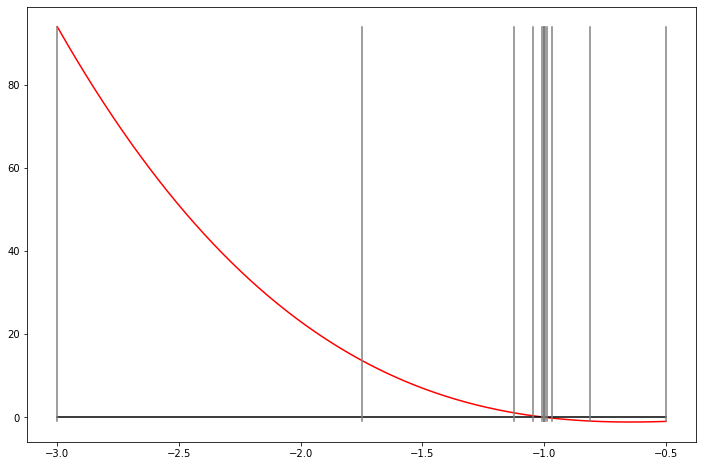

In [18]:
# make nice plot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
xd = np.linspace(a,b,1000)  # x grid
plt.plot(xd,f(xd),c='red')  # plot the function
plt.plot([a,b],[0,0],c='black')  # plot zero line
ylim=[f(a),min(f(b),0)]
plt.plot([a,a],ylim,c='grey')  # plot lower bound
plt.plot([b,b],ylim,c='grey')  # plot upper bound
def plot_step(x,**kwargs): # the number of steps that it takes to converge 
    plot_step.counter += 1
    plt.plot([x,x],ylim,c='grey')
plot_step.counter = 0  # new public attribute
bisection(f,a,b,callback=plot_step)
print('Converged in %d steps'%plot_step.counter)
plt.show()

## Newton-Raphson Method

* solves f(x)=0 using FOC 

---

1. Starts with good guess $x_{0}$
2. Newton step: $x_{i+1} = x_{i} - \frac{f(x_{i})}{f(x_{i})}$
3. Iterate until convergence in some metric

--

Newton step:
* if write Taylor series expansion around the solution
* take first two terms, assuming f(x) is the solution, and let $x_{0} = x_{i}$ and $x = x_{i+1}$

$0 = f(x) = f(x_{i}) + f'(x_{i})(x_{i+1} - x_{i})$

In [19]:
def newton(fun, grad, x0, tol=1e-6, maxiter=100, callback=None):
    ''' Newton method, with given tolerance, function, gradient, etc.'''
    
    for i in range(maxiter):
        
        x1 = x0 - fun(x0) / grad(x0) # fun and grad are both functions
        
        err = abs(x1 - x0)
        
        if callback != None: callback(x0 = x0, x1 = x1, err = err, iter = i)
        
        if err < tol: 
            break 
        x0 = x1
        
    else:
        raise RuntimeError('Failed to converge in %d iterations' % maxiter)
        
    return x1

In [27]:
f = lambda x: -4*x**3+5*x+1
g = lambda x: -12*x**2+5


def printeriter(x0, x1, iter, **kwargs): # collect all keyword arguments (ones not named)
    print('%d x0 = %1.16f x1 = %1.16f' % (iter, x0, x1))

    
x = newton(f, g, x0 = -2.5, callback=printeriter, tol=1e-10)
print('Solution is x=%1.3f, f(x)=%1.12f' % (x,f(x)))

0 x0 = -2.5000000000000000 x1 = -1.7714285714285714
1 x0 = -1.7714285714285714 x1 = -1.3311494495055727
2 x0 = -1.3311494495055727 x1 = -1.0987751438398277
3 x0 = -1.0987751438398277 x1 = -1.0131526300716971
4 x0 = -1.0131526300716971 x1 = -1.0002861679668720
5 x0 = -1.0002861679668720 x1 = -1.0000001402755980
6 x0 = -1.0000001402755980 x1 = -1.0000000000000338
7 x0 = -1.0000000000000338 x1 = -1.0000000000000000
Solution is x=-1.000, f(x)=0.000000000000


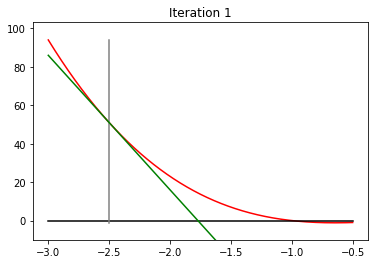

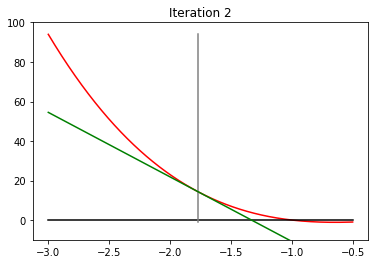

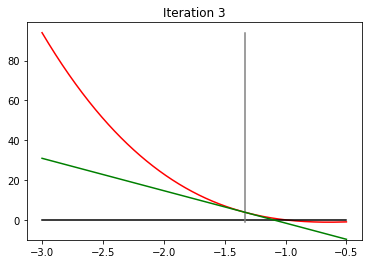

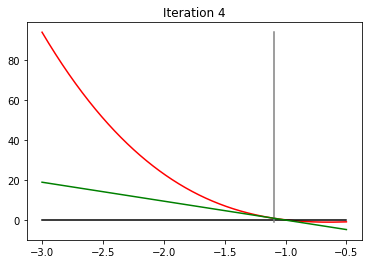

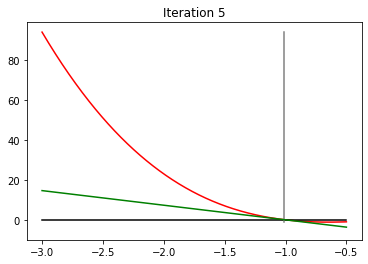

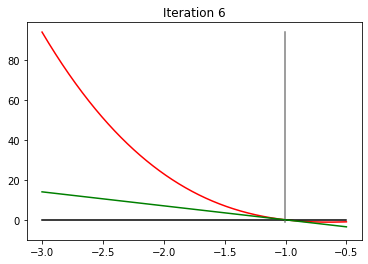

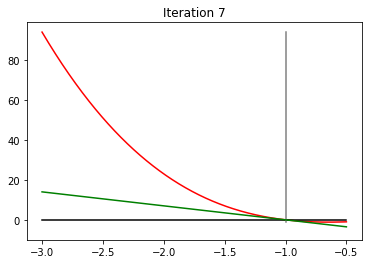

Converged in 7 steps


In [29]:
%matplotlib inline
# make nice seriest of plots
a,b = -3,-.5  # upper and lower limits
xd = np.linspace(a,b,1000)  # x grid
def plot_step(x0,x1,iter,**kwargs):
    plot_step.counter += 1
    if iter<10:
        plt.plot(xd,f(xd),c='red')  # plot the function
        plt.plot([a,b],[0,0],c='black')  # plot zero line
        ylim = [min(f(b),0),f(a)]
        plt.plot([x0,x0],ylim,c='grey') # plot x0
        l = lambda z: g(x0)*(z - x1)
        plt.plot(xd,l(xd),c='green')  # plot the function
        plt.ylim(bottom=10*f(b))
        plt.title('Iteration %d'%(iter+1))
        plt.show()
plot_step.counter = 0  # new public attribute
newton(f,g,x0=-2.5,callback=plot_step)
print('Converged in %d steps'%plot_step.counter)

Using the Newton method, we jump to the intersection of the linear approximation with the x axis, then then start again. 

Rate of convergence of the two methods

* rate of convergence = rate of decrease in bias (error)
    - bisections have linear convergence
    - Newton has quadratic convergence 

In [30]:
def print_err(iter,err,**kwargs): # bisection and method have different arguments, so use kwargs 
    x = kwargs['x'] if 'x' in kwargs.keys() else kwargs['x0']
    print('{:4d}:  x = {:17.14f}  err = {:8.6e}'.format(iter,x,err))

print('Newton method')
newton(f,g,x0=-2.5,callback=print_err,tol=1e-10)

print('Bisection method')
bisection(f,a=-3,b=-0.5,callback=print_err,tol=1e-10)

Newton method
   0:  x = -2.50000000000000  err = 7.285714e-01
   1:  x = -1.77142857142857  err = 4.402791e-01
   2:  x = -1.33114944950557  err = 2.323743e-01
   3:  x = -1.09877514383983  err = 8.562251e-02
   4:  x = -1.01315263007170  err = 1.286646e-02
   5:  x = -1.00028616796687  err = 2.860277e-04
   6:  x = -1.00000014027560  err = 1.402756e-07
   7:  x = -1.00000000000003  err = 3.375078e-14
Bisection method
   0:  x = -1.75000000000000  err = 2.500000e+00
   1:  x = -1.12500000000000  err = 1.250000e+00
   2:  x = -0.81250000000000  err = 6.250000e-01
   3:  x = -0.96875000000000  err = 3.125000e-01
   4:  x = -1.04687500000000  err = 1.562500e-01
   5:  x = -1.00781250000000  err = 7.812500e-02
   6:  x = -0.98828125000000  err = 3.906250e-02
   7:  x = -0.99804687500000  err = 1.953125e-02
   8:  x = -1.00292968750000  err = 9.765625e-03
   9:  x = -1.00048828125000  err = 4.882812e-03
  10:  x = -0.99926757812500  err = 2.441406e-03
  11:  x = -0.99987792968750  err = 1.

-0.999999999992724